# **Project 22: Bike Rental Count Predictor**

***NumPy*** : *A fundamental library for numerical computations in Python, providing support for arrays and mathematical functions.*

***Pandas*** : *A powerful data manipulation and analysis library in Python, offering data structures like DataFrames for handling structured data.*

***Warnings*** : *A module in Python used to issue warnings and alerts to developers about potential issues in their code.*

***Matplotlib*** : *A comprehensive library for creating static, animated, and interactive visualizations in Python.*

***Seaborn*** : *A statistical data visualization library in Python built on top of Matplotlib, offering an easy way to create attractive and informative statistical graphics.*

# **Data Loading**

**We import these libraries for Data Loading, Data Cleaning, Data Visualization and EDA (Explorotory Data Analysis).**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**The warnings.simplefilter("ignore") command suppresses all warnings in a Python script.**

In [2]:
warnings.simplefilter("ignore")

**The df = pd.read_csv("/content/Bike Rental Count Predictor.csv") command reads a CSV file into a Pandas DataFrame named df, and df.head(5) displays the first five rows of the DataFrame.**

In [3]:
df = pd.read_csv("/content/Bike Rental Count Predictor.csv")
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **The DataSet Contains The Follwing Information:**

- **instant: Record Index**
- **dteday: date**
- **season: season (1:springer, 2:summer, 3:fall, 4:winter)**
- **yr: year (0: 2011, 1:2012)**
- **mnth: month ( 1 to 12)**
- **hr: hour (0 to 23)**
- **holiday: weather day is holiday or not**
- **weekday: day of the week**
- **workingday: if day is neither weekend nor holiday is 1, otherwise is 0.**

**weathersit:**
- **1: Clear, Few clouds, Partly cloudy, Partly cloudy**
- **2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist**
- **3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds**
- **4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog**
- **temp : Normalized temperature in Celsius. The values are divided to 41 (max)**
- **atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)**
- **hum: Normalized humidity. The values are divided to 100 (max)**
- **windspeed: Normalized wind speed. The values are divided to 67 (max)**
- **casual: count of casual users**
- **registered: count of registered users**
- **cnt: count of total rental bikes including both casual and registered**

**The df.shape command returns the dimensions of the DataFrame df as a tuple, indicating the number of rows and columns.**

In [4]:
df.shape

(731, 16)

**The df.info() command provides a concise summary of the DataFrame df, including the number of non-null entries, data types of each column, and memory usage.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**The df.isnull().sum() command returns the total count of missing (null) values in each column of the DataFrame df.**

In [6]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


# **Data Cleaning**

**The df.rename(columns={...}, inplace=True) command renames specified columns in the DataFrame df, and df.head(5) displays the first five rows of the updated DataFrame.**

In [7]:
df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

df.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**These commands modify the DataFrame df by converting the datetime column to datetime format and casting several other columns to categorical data types for efficient storage and analysis.**

In [8]:
df['datetime']=pd.to_datetime(df.datetime)
df['season']=df.season.astype('category')
df['year']=df.year.astype('category')
df['month']=df.month.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weather_condition']=df.weather_condition.astype('category')

**To display the data types of each column in the DataFrame df, you can use the command df.dtypes. This will show whether each column is categorical, numerical, or another type of data.**

In [9]:
df.dtypes

,0
rec_id,int64
datetime,datetime64[ns]
season,category
year,category
month,category
holiday,category
weekday,category
workingday,category
weather_condition,category
temp,float64


# **Data Visualization**

**This code snippet creates a bar plot using Seaborn to visualize the season-wise monthly distribution of bike rental counts from the DataFrame df.**

**In this graph it is showing the seasonal distribution based on months and the total counts. June has the highest count, around 6000, which falls under seasons 2 and 3. In September, which is in the fourth season, there's a slightly higher count also just over 6000.**

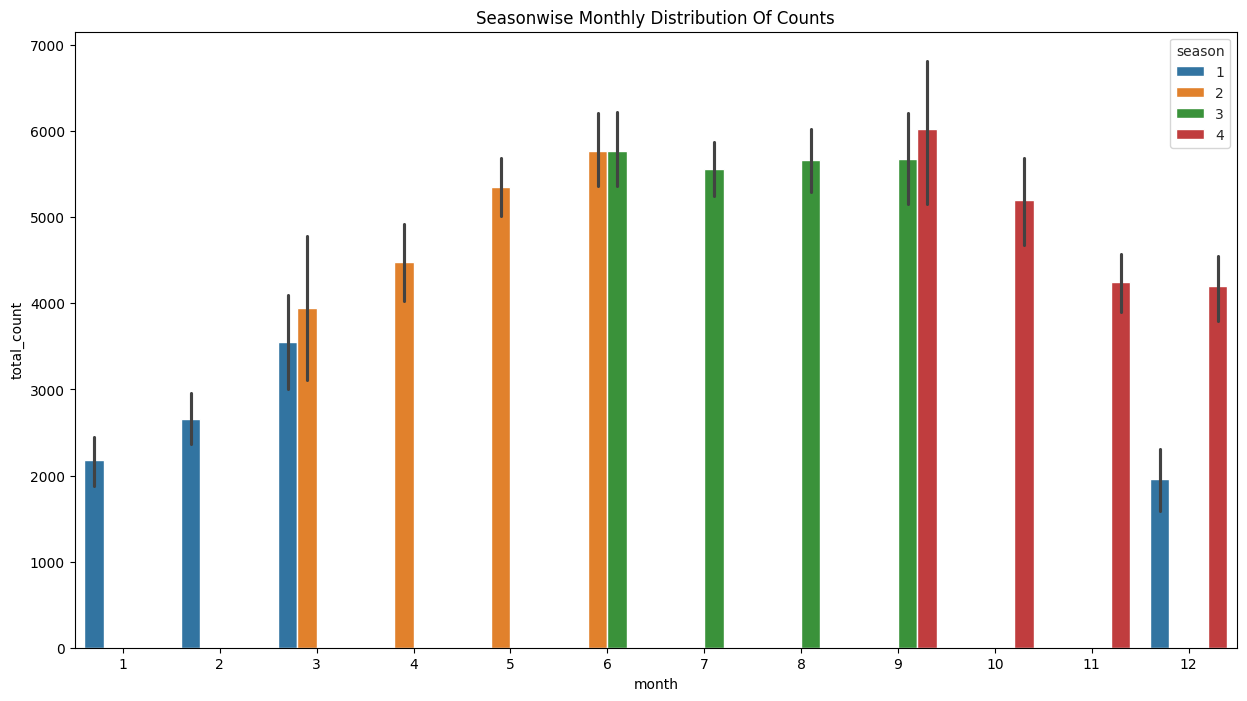

In [10]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
sns.barplot(x='month',y='total_count',data=df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise Monthly Distribution Of Counts')
plt.show()

**Plotting a bar graph to visualize the weekday-wise monthly distribution of bike rental counts.**

**In this graph, we analyze the total count on a weekly basis across different months. The highest count is in September, where in one week of season 6 it reaches approximately 6500. Conversely, the lowest count is in January, with a maximum of only 2500 total counts.**

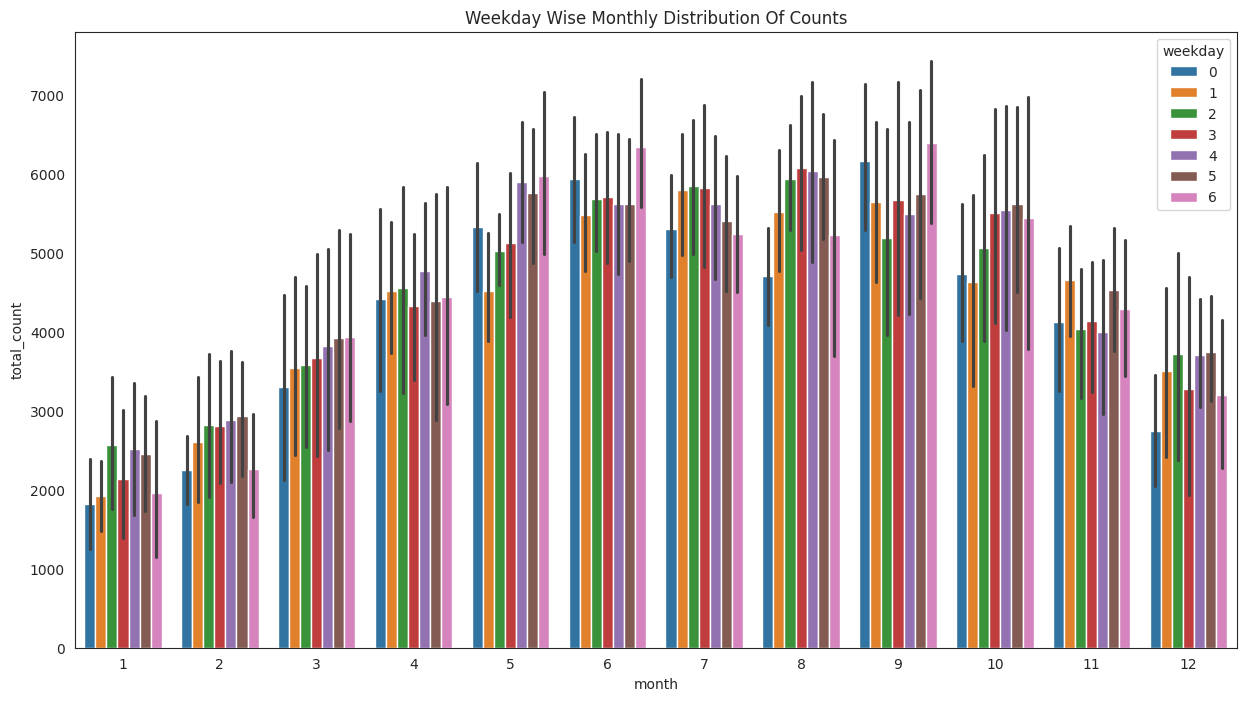

In [11]:
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=df[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday Wise Monthly Distribution Of Counts')
plt.show()

**This code creates a bar plot using Seaborn to visualize the yearly distribution of bike rental counts from the DataFrame df. The plot distinguishes between the years 2011 and 2012.**

**In this graph, we observe the yearly distribution of total counts. In 2012, there are approximately 5700 total counts, whereas in 2011, there are 3300 total counts.**

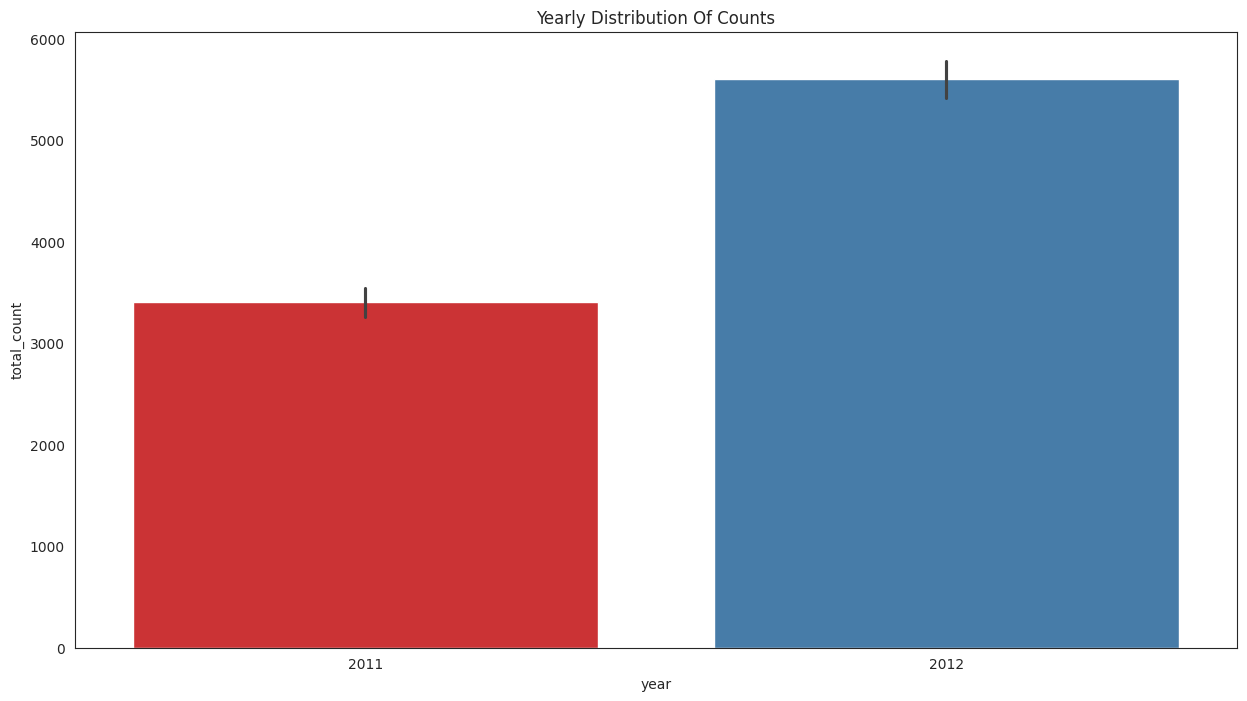

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='year', y='total_count', data=df[['year', 'total_count']], palette="Set1")
ax.set_xticks([0, 1])
ax.set_xticklabels(['2011', '2012'])
ax.set_title('Yearly Distribution Of Counts')
plt.show()

**This code snippet creates a bar plot using Seaborn to visualize the distribution of bike rental counts based on holidays and seasons from the DataFrame df.**

**In this graph, we observe the distribution based on holidays. For instance, in season 3, the maximum total count for "No Holiday" is around 6000. However, for "Yes Holiday," it can go up to 7000 as shown in the graph.**

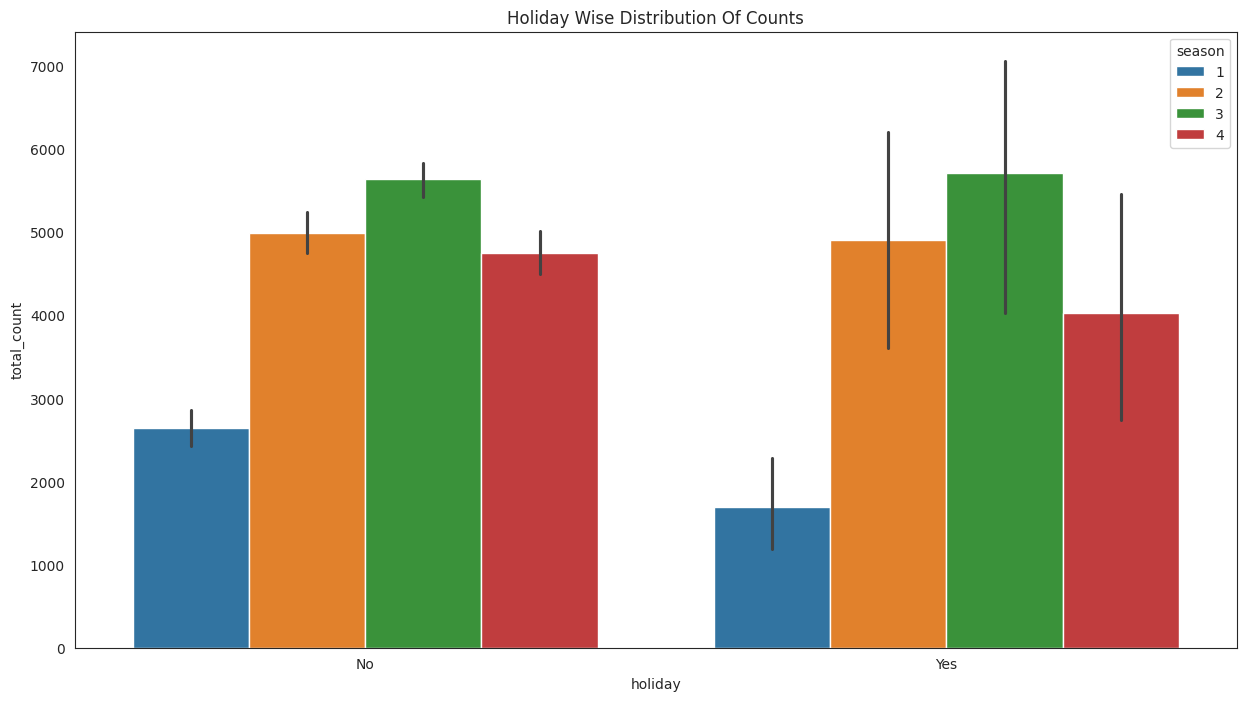

In [13]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='holiday',y='total_count',hue='season')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
ax.set_title('Holiday Wise Distribution Of Counts')
plt.show()

**First five rows of the DataFrame df after the transformations and visualizations.**

In [14]:
df.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Now the DataFrame includes additional columns for day (Day), month (Month), and year (Year) extracted from the datetime.**

In [15]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df["Day"] = df['datetime'].dt.day
df["Month"] = df['datetime'].dt.month
df["Year"] = df['datetime'].dt.year
df.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count,Day,Month,Year
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2,1,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3,1,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4,1,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5,1,2011


**After dropping the datetime column from the DataFrame df.**

In [16]:
df = df.drop(['datetime'], axis=1)
df.head(5)

,rec_id,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count,Day,Month,Year
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,2011
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2,1,2011
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3,1,2011
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4,1,2011
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5,1,2011


**This code snippet generates a heatmap using Seaborn to visualize the correlation matrix of the DataFrame df, annotating the heatmap with correlation values and using the 'coolwarm' colormap.**

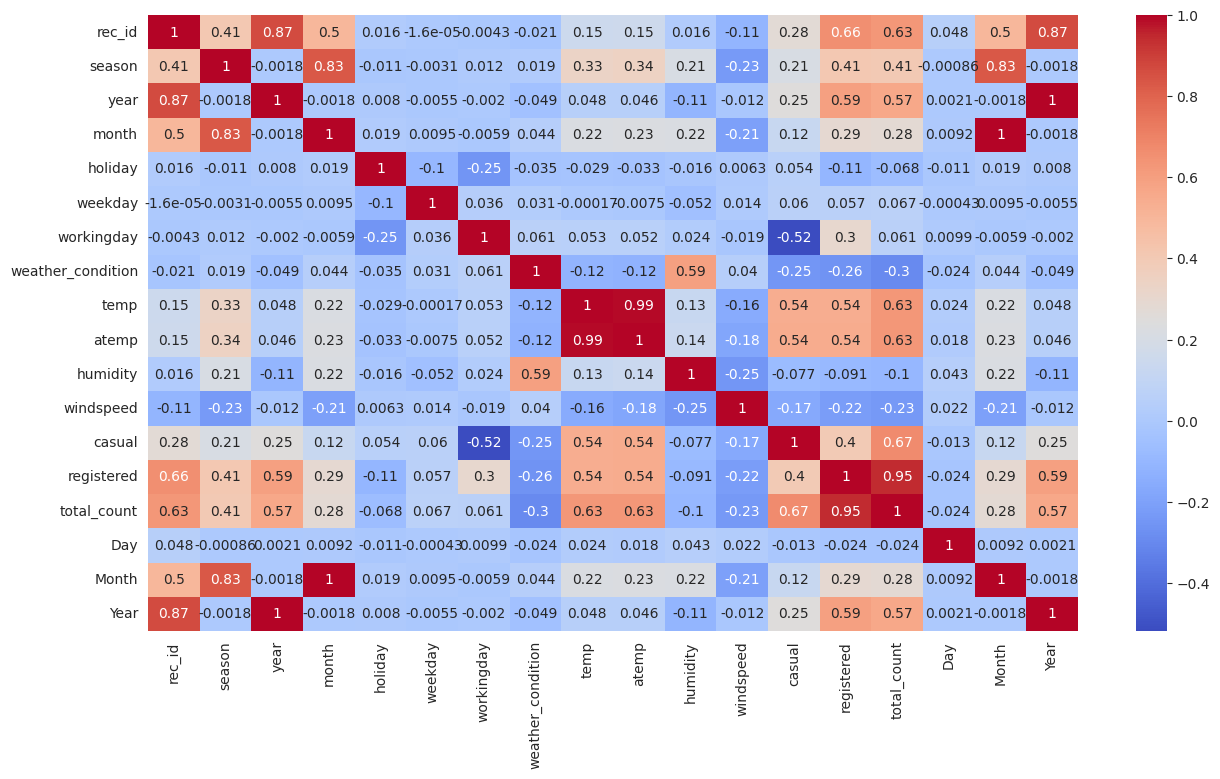

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Current columns in the DataFrame df:**

In [18]:
df.columns

Index(['rec_id', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_condition', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'total_count', 'Day', 'Month', 'Year'],
      dtype='object')

**Deleting a useless identifier column and then inspecting what features actually remain — basic cleanup before doing anything serious with the data.**

In [20]:
df.drop(columns={"rec_id"}, inplace=True)
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_condition', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'total_count', 'Day', 'Month', 'Year'],
      dtype='object')

# **Model Building**

**X includes columns such as rec_id, various temporal and weather-related features, and other variables that might influence the prediction of total_count.**

**y consists solely of the total_count column, which serves as the target for your predictive models.**

In [21]:
X = df[['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_condition', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'Day', 'Month', 'Year']]

y = df[['total_count']]

**The code uses MinMaxScaler from Scikit-learn to scale the features (X) and target (y) dataframes to a range between 0 and 1, facilitating consistent scaling for machine learning models that require normalized input data.**

In [22]:
from sklearn.preprocessing import MinMaxScaler

Scaler_X = MinMaxScaler().set_output(transform = "pandas")

X = Scaler_X.fit_transform(X)

Scaler_y = MinMaxScaler().set_output(transform = "pandas")

y = Scaler_y.fit_transform(y)

**These imports from sklearn allow for splitting data into training and testing sets using train_test_split and for calculating the mean squared error metric using mean_squared_error for evaluating regression models.**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**This command splits the data into training and testing sets (X_train, X_test for features and y_train, y_test for target) with a train size of 80% and a test size of 20%, which is a common practice in machine learning for evaluating model performance on unseen data.**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

**1: Model Initialization: Sets up a Linear Regression model with parallel computation (n_jobs=-1).**

**2: Training: Fits the model to the training data (X_train, y_train).**

**3: Prediction: Uses the trained model to predict outcomes on the test set (X_test).**

**4: Error Calculation: Computes the mean squared error between the predicted values and the actual test set values, printing the result.**

In [25]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(n_jobs= -1)

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Linear Regression Mean Squared Error: ", MSE)

Linear Regression Mean Squared Error:  3.4484627255929545e-32


**1: Model Setup: Initializes a Random Forest Regressor with 100 trees (n_estimators=100), utilizing all available processors (n_jobs=-1) for parallel computation.**

**2: Training: Fits the Random Forest model to the training data (X_train, y_train).**

**3: Prediction: Predicts outcomes using the trained model on the test set (X_test).**

**4: Evaluation: Computes the Mean Squared Error (MSE) between the predicted and actual values from the test set, then prints the result.**

In [26]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Random Forest Mean Squared Error: ", MSE)

Random Forest Mean Squared Error:  0.00014061754663052697


**1: Model Initialization: Sets up a Decision Tree Regressor with a maximum depth of 100.**

**2: Training: Fits the Decision Tree model to the training data (X_train, y_train).**

**3: Prediction: Uses the trained model to predict outcomes on the test set (X_test).**

**4: Error Calculation: Computes the Mean Squared Error (MSE) between the predicted values and the actual test set values, printing the result.**

In [27]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=100)

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Decision Tree Mean Squared Error: ", MSE)

Decision Tree Mean Squared Error:  0.0007649670977961025


**1: Model Selection: Initializes a Support Vector Machine for regression (SVR) using the RBF kernel.**

**2: Training: Fits the SVR model to the training data (X_train, y_train).**

**3: Prediction: Uses the trained SVR model to predict outcomes on the test set (X_test).**

**4: Error Calculation: Computes the Mean Squared Error (MSE) between the predicted values and the actual test set values, printing the result.**

In [28]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Support Vector Machine Mean Squared Error: ", MSE)

Support Vector Machine Mean Squared Error:  0.0034876762062954927


**1: Model Initialization: Creates a Lasso regression model (Ls) with regularization strength defined by alpha=0.01.**

**2: Training: Fits the Lasso model to the training data (X_train, y_train).**

**3: Prediction: Uses the trained Lasso model to predict outcomes on the test set (X_test).**

**4: Error Evaluation: Computes the Mean Squared Error (MSE) between the predicted values (y_pred) and the actual test set values (y_test), printing the result.**

In [29]:
from sklearn.linear_model import Lasso

Ls = Lasso(alpha=0.01)

Ls.fit(X_train, y_train)

y_pred = Ls.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Lasso Mean Squared Error: ", MSE)

Lasso Mean Squared Error:  0.003312475589488753


# **Conclusion:**

- **Linear Regression: Had the highest MSE of 3.4484.**
- **Random Forest Regressor (RFR): Achieved the lowest MSE of 0.0001.**
- **Decision Tree Regressor: Had an MSE of 0.0007.**
- **Support Vector Regressor (SVR): Produced an MSE of 0.0034.**
- **Lasso Regression: Showed an MSE of 0.0033.**

**Among the models evaluated, the Random Forest Regressor (RFR) performed the best, exhibiting the lowest mean squared error, indicating superior predictive accuracy compared to other models tested.**

# **Save Model**

**This code serializes and saves the trained RFR model along with its feature and target scalers into binary pickle files so they can be loaded and reused later without retraining.**

In [30]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump(RFR, file)

with open("Scaler_X.pickle", "wb") as file:
    pickle.dump(Scaler_X, file)

with open("Scaler_y.pickle", "wb") as file:
    pickle.dump(Scaler_y, file)